In [1]:
import os

import pandas as pd


In [2]:
path_list = os.path.abspath('').split("\\")

In [3]:
# to go to data directory
data_path = "\\".join(path_list[:-2]) + "\\data\\"

In [4]:
file_name = 'in+vehicle+coupon+recommendation.zip'

df = pd.read_csv(data_path + file_name, compression='zip')

* destination: No Urgent Place, Home, Work
* passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
* weather: Sunny, Rainy, Snowy
* temperature:55, 80, 30 Fahrenheit?
* time: 2PM, 10AM, 6PM, 7AM, 10PM
* coupon: Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)
* expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
* gender: Female, Male
* age: 21, 46, 26, 31, 41, 50plus, 36, below21
* maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
* has_Children:1, 0
* education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
* occupation: Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
* income: $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499, 
$50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500
* Bar: never, less1, 1~3, gt8,  nan4~8 (feature meaning: how many times do you go to a bar every month?)
* CoffeeHouse: never, less1, 4~8, 1~3, gt8,  nan (feature meaning: how many times do you go to a coffeehouse every month?)
* CarryAway:n4~8, 1~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
* RestaurantLessThan20: 4~8, 1~3, less1, gt8,  never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than 20 every month?)
* Restaurant20To50: 1-3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)
* toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
* toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
* direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* Y:1, 0 (whether the coupon is accepted)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [7]:
df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [8]:
del df['car']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

<Axes: >

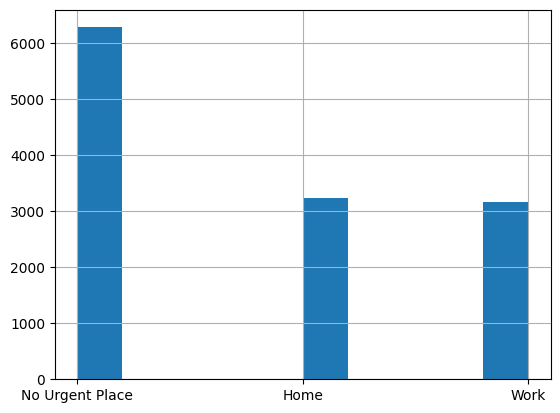

In [10]:
df['destination'].hist()

<Axes: >

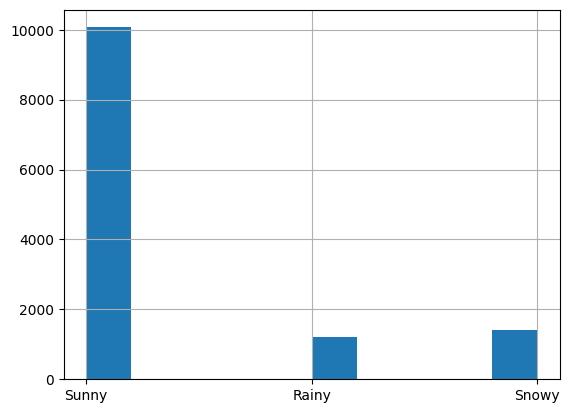

In [11]:
df['weather'].hist()

<Axes: >

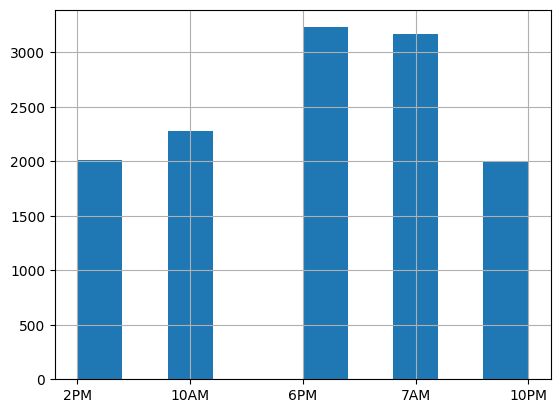

In [12]:
df['time'].hist()

<Axes: >

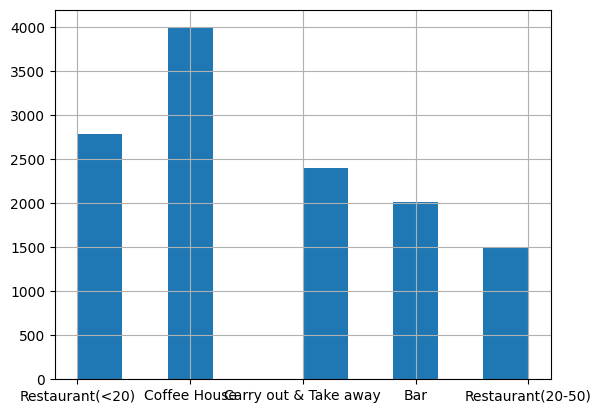

In [13]:
df['coupon'].hist()

<Axes: >

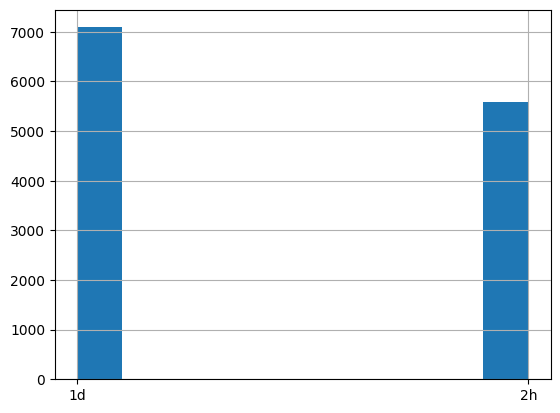

In [14]:
df['expiration'].hist()

<Axes: >

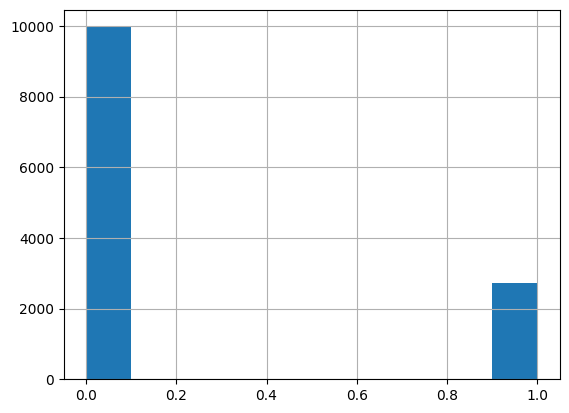

In [15]:
df['direction_same'].hist()

<Axes: >

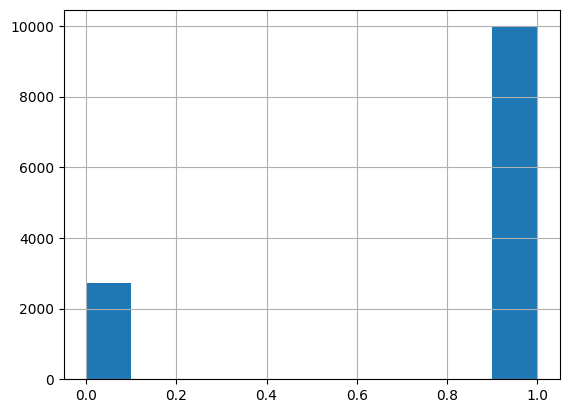

In [16]:
df['direction_opp'].hist()

<Axes: >

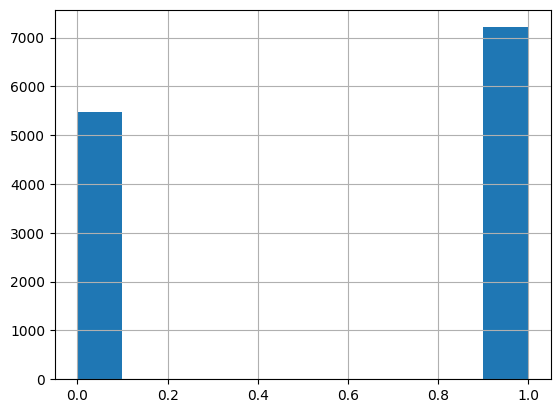

In [17]:
df['Y'].hist()

In [18]:
df[(df['direction_same'] == 0) & (df['direction_opp'] == 0)]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


In [19]:
df[(df['direction_same'] == 1) & (df['direction_opp'] == 1)]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


In [20]:
df[(df['direction_same'] == 0) & (df['direction_opp'] == 1)].count()

destination             9960
passanger               9960
weather                 9960
temperature             9960
time                    9960
coupon                  9960
expiration              9960
gender                  9960
age                     9960
maritalStatus           9960
has_children            9960
education               9960
occupation              9960
income                  9960
Bar                     9867
CoffeeHouse             9781
CarryAway               9828
RestaurantLessThan20    9848
Restaurant20To50        9809
toCoupon_GEQ5min        9960
toCoupon_GEQ15min       9960
toCoupon_GEQ25min       9960
direction_same          9960
direction_opp           9960
Y                       9960
dtype: int64

In [21]:
df[(df['direction_same'] == 1) & (df['direction_opp'] == 0)].count()

destination             2724
passanger               2724
weather                 2724
temperature             2724
time                    2724
coupon                  2724
expiration              2724
gender                  2724
age                     2724
maritalStatus           2724
has_children            2724
education               2724
occupation              2724
income                  2724
Bar                     2710
CoffeeHouse             2686
CarryAway               2705
RestaurantLessThan20    2706
Restaurant20To50        2686
toCoupon_GEQ5min        2724
toCoupon_GEQ15min       2724
toCoupon_GEQ25min       2724
direction_same          2724
direction_opp           2724
Y                       2724
dtype: int64

In [22]:
df[['destination', 'weather', 'time', 'coupon', 'expiration', 'direction_same', 'Y']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   destination     12684 non-null  object
 1   weather         12684 non-null  object
 2   time            12684 non-null  object
 3   coupon          12684 non-null  object
 4   expiration      12684 non-null  object
 5   direction_same  12684 non-null  int64 
 6   Y               12684 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 693.8+ KB


In [23]:
df[['destination', 'weather', 'time', 'coupon', 'expiration', 'direction_same', 'Y']].head()

,destination,weather,time,coupon,expiration,direction_same,Y
0,No Urgent Place,Sunny,2PM,Restaurant(<20),1d,0,1
1,No Urgent Place,Sunny,10AM,Coffee House,2h,0,0
2,No Urgent Place,Sunny,10AM,Carry out & Take away,2h,0,1
3,No Urgent Place,Sunny,2PM,Coffee House,2h,0,0
4,No Urgent Place,Sunny,2PM,Coffee House,1d,0,0


## category data with xgboost

https://developer.nvidia.com/blog/categorical-features-in-xgboost-without-manual-encoding/

In [24]:
import xgboost as xgb

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import f1_score

In [26]:
data_df = df[['destination', 'weather', 'time', 'coupon', 'expiration', 'direction_same', 'Y']]

In [27]:
data_df.head(3)

,destination,weather,time,coupon,expiration,direction_same,Y
0,No Urgent Place,Sunny,2PM,Restaurant(<20),1d,0,1
1,No Urgent Place,Sunny,10AM,Coffee House,2h,0,0
2,No Urgent Place,Sunny,10AM,Carry out & Take away,2h,0,1


In [28]:
data_df.rename(columns={'direction_same': 'same_direction','Y':'coupon_accepting'}, inplace = True)

C:\Users\bunwa\AppData\Local\Temp\ipykernel_32364\3038047938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.rename(columns={'direction_same': 'same_direction','Y':'coupon_accepting'}, inplace = True)


In [29]:
data_df.head(3)

,destination,weather,time,coupon,expiration,same_direction,coupon_accepting
0,No Urgent Place,Sunny,2PM,Restaurant(<20),1d,0,1
1,No Urgent Place,Sunny,10AM,Coffee House,2h,0,0
2,No Urgent Place,Sunny,10AM,Carry out & Take away,2h,0,1


In [30]:
def changeBoolToString(value):
    if value == 0:
        return 'No'
    elif value == 1:
        return 'Yes'

In [31]:
 data_df['same_direction'] = data_df['same_direction'].apply(lambda x: changeBoolToString(x))

C:\Users\bunwa\AppData\Local\Temp\ipykernel_32364\2385230133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['same_direction'] = data_df['same_direction'].apply(lambda x: changeBoolToString(x))


In [32]:
 data_df['coupon_accepting'] = data_df['coupon_accepting'].apply(lambda x: changeBoolToString(x))

C:\Users\bunwa\AppData\Local\Temp\ipykernel_32364\262003874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['coupon_accepting'] = data_df['coupon_accepting'].apply(lambda x: changeBoolToString(x))


In [33]:
 data_df.tail(20)

,destination,weather,time,coupon,expiration,same_direction,coupon_accepting
12664,No Urgent Place,Sunny,10PM,Bar,2h,No,No
12665,No Urgent Place,Sunny,10AM,Carry out & Take away,2h,No,Yes
12666,No Urgent Place,Snowy,2PM,Restaurant(<20),1d,No,Yes
12667,No Urgent Place,Rainy,10AM,Bar,1d,No,No
12668,No Urgent Place,Sunny,10AM,Restaurant(<20),2h,No,Yes
12669,No Urgent Place,Sunny,10AM,Restaurant(20-50),1d,No,Yes
12670,No Urgent Place,Rainy,6PM,Bar,2h,No,No
12671,No Urgent Place,Snowy,10AM,Restaurant(<20),1d,No,Yes
12672,Home,Sunny,6PM,Carry out & Take away,2h,Yes,No
12673,Home,Sunny,6PM,Carry out & Take away,1d,No,No


In [34]:
data_df['destination'] = data_df['destination'].astype('category')

C:\Users\bunwa\AppData\Local\Temp\ipykernel_32364\2737164046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['destination'] = data_df['destination'].astype('category')


In [35]:
for col in data_df.columns:
    # print(col)
    if col == 'same_direction' or col == 'coupon_accepting':
        pass
    else:
        data_df[col] = data_df[col].astype('category')

C:\Users\bunwa\AppData\Local\Temp\ipykernel_32364\1550275389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = data_df[col].astype('category')
C:\Users\bunwa\AppData\Local\Temp\ipykernel_32364\1550275389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = data_df[col].astype('category')
C:\Users\bunwa\AppData\Local\Temp\ipykernel_32364\1550275389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [36]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   destination       12684 non-null  category
 1   weather           12684 non-null  category
 2   time              12684 non-null  category
 3   coupon            12684 non-null  category
 4   expiration        12684 non-null  category
 5   same_direction    12684 non-null  object  
 6   coupon_accepting  12684 non-null  object  
dtypes: category(5), object(2)
memory usage: 261.0+ KB


In [37]:
df_train, df_test = train_test_split( data_df, test_size=0.3, random_state=11)

In [38]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
df_train.head(3)

,destination,weather,time,coupon,expiration,same_direction,coupon_accepting
0,Home,Sunny,10PM,Carry out & Take away,1d,Yes,Yes
1,Home,Sunny,6PM,Coffee House,2h,No,Yes
2,No Urgent Place,Sunny,2PM,Restaurant(<20),1d,No,Yes


In [40]:
df_test.head(3)

,destination,weather,time,coupon,expiration,same_direction,coupon_accepting
0,No Urgent Place,Sunny,6PM,Coffee House,2h,No,No
1,Home,Sunny,6PM,Carry out & Take away,2h,Yes,Yes
2,Home,Rainy,10PM,Coffee House,1d,Yes,No


In [41]:
feature_cols = ['destination', 'weather', 'time', 'coupon', 'expiration', 'same_direction']

X_train = df_train[feature_cols]
y_train = df_train[['coupon_accepting']].values
X_test = df_test[feature_cols]
y_test = df_test[['coupon_accepting']].values

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8878, 6)
(8878, 1)
(3806, 6)
(3806, 1)


In [43]:
train_dicts = X_train.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
tf_X_train = dv.fit_transform(train_dicts)
tf_X_test = dv.transform(test_dicts)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   destination     8878 non-null   category
 1   weather         8878 non-null   category
 2   time            8878 non-null   category
 3   coupon          8878 non-null   category
 4   expiration      8878 non-null   category
 5   same_direction  8878 non-null   object  
dtypes: category(5), object(1)
memory usage: 113.6+ KB


In [49]:
ddd = {
    "destination": ["No Urgent Place", "Home", "Work"],
    "weather": ["Sunny", "Rainy", "Snowy"],
    "time": ["10AM", "10PM", "7AM"],
    "coupon": ["Coffee House","Coffee House","Coffee House"],
    "expiration": ["2h", "2h", "1d"],
    "same_direction": [0, 1, 1],
    "coupon_accepting": [0, 0, 0],

}

pd.DataFrame.from_dict(ddd)

,destination,weather,time,coupon,expiration,same_direction,coupon_accepting
0,No Urgent Place,Sunny,10AM,Coffee House,2h,0,0
1,Home,Rainy,10PM,Coffee House,2h,1,0
2,Work,Snowy,7AM,Coffee House,1d,1,0


In [48]:
pd.DataFrame(ddd)

,destination,weather,time,coupon,expiration,same_direction,coupon_accepting
0,No Urgent Place,Sunny,10AM,Coffee House,2h,0,0
1,Home,Rainy,10PM,Coffee House,2h,1,0
2,Work,Snowy,7AM,Coffee House,1d,1,0


## xgboost

In [45]:
dtrain = xgb.DMatrix(tf_X_train, label=y_train)

ValueError: could not convert string to float: 'Yes'

In [ ]:
dtest = xgb.DMatrix(tf_X_test, label=y_test)

In [ ]:
xgb_params = {
    'eta': 0.01,                     
    'max_depth': 6,
    'min_child_weight': 1,          
               
    'eval_metric': 'auc',

    'nthread': 8,                  
    'seed': 1,
    'verbosity': 1,                
}

watchlist = [(dtrain, 'train'), (dtest, 'test')]       # check performance on train and test set for each round

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
            verbose_eval=5,
            early_stopping_rounds=40,
            evals=watchlist)



[0]	train-auc:0.72588	test-auc:0.72155
[5]	train-auc:0.72588	test-auc:0.72152
[10]	train-auc:0.72591	test-auc:0.72154
[15]	train-auc:0.72608	test-auc:0.72177
[20]	train-auc:0.72614	test-auc:0.72186
[25]	train-auc:0.72614	test-auc:0.72186
[30]	train-auc:0.72690	test-auc:0.72323
[35]	train-auc:0.72707	test-auc:0.72365
[40]	train-auc:0.72719	test-auc:0.72372
[45]	train-auc:0.72740	test-auc:0.72411
[50]	train-auc:0.72743	test-auc:0.72411
[55]	train-auc:0.72744	test-auc:0.72400
[60]	train-auc:0.72759	test-auc:0.72387
[65]	train-auc:0.72757	test-auc:0.72387
[70]	train-auc:0.72759	test-auc:0.72398
[75]	train-auc:0.72792	test-auc:0.72442
[80]	train-auc:0.72793	test-auc:0.72445
[85]	train-auc:0.72809	test-auc:0.72456
[90]	train-auc:0.72821	test-auc:0.72498
[95]	train-auc:0.72828	test-auc:0.72504
[99]	train-auc:0.72853	test-auc:0.72568


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)


0.7256835169227348

## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(n_estimators=5, max_depth=5,random_state=1)
rf.fit(tf_X_train, y_train)

C:\Users\bunwa\AppData\Local\Temp\ipykernel_22248\3707176151.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(tf_X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=5, random_state=1)

In [ ]:
y_train_pred = rf.predict(tf_X_train)

In [ ]:
tf_X_train[0]

array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1.])

In [ ]:
f1_sc = f1_score(y_train, y_train_pred, average='micro')
print(f'train: {f1_sc:0.4f}')

train: 0.6652
